#  レコメンデーション発展

- **[3.1 コンテンツベースフィルタリング](#3.1-コンテンツベースフィルタリング)**
    - **[3.1.1 単語の情報を利用して重みづけをする。](#3.1.1-単語の情報を利用して重みづけをする。)**
    - **[3.1.2 対象の単語の出現回数で重みづけする。](#3.1.2-対象の単語の出現回数で重みづけする。)**
    - **[3.1.3 単語の位置による重みづけ](#3.1.3-単語の位置による重みづけ)**
    - **[3.1.4 単語間の距離による重みづけ](#3.1.4-単語間の距離による重みづけ)**
    - **[3.1.5 インバウンドリンクによる重みづけ](#3.1.5-インバウンドリンクによる重みづけ)**
<br><br>
- **[3.2 PageRankアルゴリズム](#3.2-PageRankアルゴリズム)**
    - **[3.2.1 PageRankアルゴリズムの概要](#3.2.1-PageRankアルゴリズムの概要)**
    - **[3.2.2 PageRankの計算(1)](#3.2.2-PageRankの計算(1)**
    - **[3.2.3 PageRankの計算(2)](#3.2.3-PageRankの計算(2)**
    - **[3.2.4 PageRankで重みづけする関数を作成する。](#3.2.4-PageRankで重みづけする関数を作成する。)**
<br><br>
- **[3.5 添削問題](#3.5-添削問題)**

***

## 3.1 コンテンツベースフィルタリング

### 3.1.1 単語の情報を利用して重みづけをする。

chapter1,2ではクローリングされた順番にURLが表示されていました。   
そこでWEBページから取得した情報をもとに各WEBページに重みをつけてレコメンドしましょう。   

重みをつけて返すための関数を作成します。   
weightには後ほど重みを評価する関数を入れていきます。   

```python
def weightlist(rows, words_list):
    totalscores = dict([(row[0],0) for row in rows])

    weights = []

    for (weight, scores) in weights:
        for url in totalscores:
            totalscores[url] += weight * scores[url]
    return totalscores
        
```
後ほどweightsには(評価関数の重み, そのWEBページの重み)を返すリストを追加していきます。   

rowsには[url,単語1の位置, 単語2の位置, ...]が入ります。   
totalscoreはURLをkeyにした辞書型となり、{url:重み} となります。   


#### 問題

- 評価関数として有効なものはどれでしょう

- クエリとなっている言葉のフォントのサイズ
- クエリとなっている言葉の出現頻度
- WEBページの閲覧者数
- 上記のすべて

#### ヒント

- 評価関数には様々なものがあります。
- 評価関数はWEBページの推薦度と相関のあるものを選びましょう。

#### 解答

上記のすべて

***

### 3.1.2 対象の単語の出現回数で重みづけする。   

最も単純な重みづけの基準として検索している単語がページ中何回出現したか、というものがあります。

単語の出現回数をそのまま重みにするのでは評価方法によって重みが変化しすぎてしまいます。   
そこで重みを０～１の範囲に正規化することによって異なる評価方法でも妥当に比較できるようにしましょう。   

正規化関数は値の大きいほうが推薦度の高くなる場合と小さいほうが推薦度が高くなる場合が考えられます。   
そこで正規化関数ではこれを分けられるようにします。   

```python
def normalizescores(scores, small_flag=0):
    vsmall = 0.00001
    # small_flagが1だと小さいほうが重みが1に近づくようになる。
    if small_flag:
        minscore = min(scores.values())
        return dict([(url,float(minscore)/max(vsmall,l)) for (url,l) in scores.items()])
    else:
        maxscore = max(scores.values())
        if maxscore == 0:
            maxscore = vsmall
        return dict([(url,float(count) / maxscore) for (url,count) in scores.items()])
```

注意点として小さいほう優先のとき値が0だと値が無限になってしまいエラーになってしまします。   
そのため十分小さい数をしきい値として設定して計算します。

#### 問題

- frequeryscoreは単語の頻度を計算する関数です。空欄を埋めてこれを完成させてください。
- countsは{URL : 出現回数}の辞書型にしてください。

In [ ]:
def normalizescores(scores, small_flag=0):
    # 十分に小さいしきい値を設定してください。
    
    # small_flagが1だと小さいほうが重みが1に近づくようになる。
    if small_flag:
        # ０～１の範囲に正規化を行ってください。
        
        
    else:
        # ０～１の範囲に正規化を行ってください。

        
        
        
    
# 単語の出現頻度を計算する関数を実装してください。
def frequeryscore(rows):
    counts = dict([(row[0], 0) for row in rows])

    
    return　normalizescores(counts)

#### ヒント

- countsのkeyはurlの名前なのでcounts[url]でURLの値が操作できます。

#### 解答例

In [ ]:
def normalizescores(scores, small_flag=0):
    # 十分に小さいしきい値を設定してください。
    vsmall = 0.00001
    # small_flagが1だと小さいほうが重みが1に近づくようになる。
    if small_flag:
        # ０～１の範囲に正規化を行ってください。
        minscore = min(scores.values())
        return dict([(url,float(minscore)/max(vsmall,l)) for (url,l) in scores.items()])
    else:
        # ０～１の範囲に正規化を行ってください。
        maxscore = max(scores.values())
        if maxscore == 0:
            maxscore = vsmall
        return dict([(url,float(count) / maxscore) for (url,count) in scores.items()])
    
# 単語の出現頻度を計算する関数を実装してください。
def frequeryscore(rows):
    counts = dict([(row[0], 0) for row in rows])
    for row in rows:
        counts[row[0]] += 1
    return normalizescores(counts)

***

### 3.1.3 単語の位置による重みづけ

検索したい単語はWEBページの初めにあるほどメインのトピックである可能性が高いと考えられます。   
そこで単語の出現した位置の和で重みを評価します。   

#### 問題

- 単語の出現した位置で評価する関数を実装してください。
- クエリの単語の出現した位置の和を求めて正規化関数に渡してください。

In [ ]:
# 単語の出現した位置で評価する関数を実装してください。
def locationscore(rows):
    locations = dict([(row[0],1000000) for row in rows])

    
    
        return normalizescores(locations, small_flag=1)

#### ヒント

- 重みの初期値は十分大きい数を利用してください。
- 正規化関数に渡すとき、小さいほうが優れているので small_flagを設定しましょう。

#### 解答例

In [ ]:
# 単語の出現した位置で評価する関数を実装してください。
def locationscore(rows):
    locations = dict([(row[0],1000000) for row in rows])
    for row in rows:
        location = sum(row[1:])
        if location < locations[row[0]]:
            locations[row[0]] = location
        return normalizescores(locations, small_flag=1)

***

### 3.1.4 単語間の距離による重みづけ

複数の単語で検索するときそれらの単語が近いほど求めている内容である可能性は高まります。   
そこで単語間の距離でも重みを評価してみましょう。   

複数クエリが存在する場合隣接する単語間の距離の合計を評価値とします。   
単語が一つだけの場合はすべてに1を返しましょう

#### 問題

- 空欄を埋めて単語間距離を計算する関数を実装してください。
- 返し値は{URL:評価値}の辞書型で正規化関数を利用して正規化してください。

In [ ]:
# 単語間の距離を評価する関数を実装してください。
def distancescore(rows):
    if len(rows[0]) <= 2:
        return dict([(row[0],1.0) for row in rows])
    # 初期値を設定します。
    mindistance = 
    for row in rows:
        dist = 0
        # distに単語間距離の合計を計算してください。

        
        
        if dist < mindistance[row[0]]:
            mindistance[row[0]] = dist
    return normalizescores(mindistance, small_flag=1)

#### ヒント

- mindistanceの初期値は十分大きいものを使用してください。
- minidistanceは{URL:評価値}な辞書型です。

#### 解答例

In [ ]:
# 単語間の距離を評価する関数を実装してください。
def distancescore(rows):
    if len(rows[0]) <= 2:
        return dict([(row[0],1.0) for row in rows])
    # 初期値を設定します。
    mindistance = dict([(row[0],1000000) for row in rows])
    for row in rows:
        # distに単語間距離の合計を計算してください。
        dist = sum([abs(row[i] - row[i-1]) for i in range(2,len(row))])
        if dist < mindistance[row[0]]:
            mindistance[row[0]] = dist
    return normalizescores(mindistance, small_flag=1)

***

### 3.1.5 インバウンドリンクによる重みづけ

外部のサイトなどから自分のサイト内のページへのリンクのことをインバウンドリンクと呼びます。   
価値のあるWEBページほど多くのWEBページからリンクされることが多くあります。   

実際にアカデミックな論文などではインバウンドリンクの数で評価されることがあります。   
ただしこの評価方法はクエリの情報を使用していないためほかの評価方法と合わせて使用することが必要です。   

インバウンドリンクの数を数えるのにはselectメソッドでcountメソッドを使いましょう。
SQL文のselectメソッドでは計算結果を出力することができます。   

例題から考えてみましょう。   
sample.dbの T テーブルにはカラムa,b,cがあり、   
[0,1,2]   
[3,4,5]   
[6,7,8]   
となっているとします。
```python
# a+bの値を出力する。
add = conn.execute("select a+b from T").fetchall()
print(add)
print()

# 行数を数える。
count = conn.execute("select count(*) from T")
print(count)
```
出力
```
[1,]
[7,]
[13,]

3
```
となります。


#### 問題

- インバウンドリンクの数を数える評価関数を実装してください。
- 正規化関数を渡して正規化してください。

In [ ]:
def inboundlinkscore(rows):
    uniqueurls = set([row[0] for row in rows])
    # SQLからインバウンドリンクの数を返してください。
    sql = 
    inboundcount = dict([(url, conn.execute(sql % url).fetchone()) for url in uniqueurls])
    return normalizescores(inboundcount)

#### ヒント

- %sに ' を付けることを忘れないようにしましょう。

#### 解答例

In [ ]:
def inboundlinkscore(rows):
    uniqueurls = set([row[0] for row in rows])
    # SQLからインバウンドリンクの数を返してください。
    sql = "select count(*) from link where url_to = '%s'"
    inboundcount = dict([(url, conn.execute(sql % url).fetchone()) for url in uniqueurls])
    return normalizescores(inboundcount)

***

## 3.2 PageRankアルゴリズム

### 3.2.1 PageRankアルゴリズムの概要


PageRankとはもともとGoogleの創設者によって発明されたアルゴリズムでそのページがすべてのページからしてどの程度大切なのかを割り当てたものです。<br> 
他のページからのリンクが多いほどランキングは高く、ランキングの高いページからのリンクは高く評価するという発想からできています。<br>


Pagerankの実際の計算の方法としては次の図をご覧ください。   

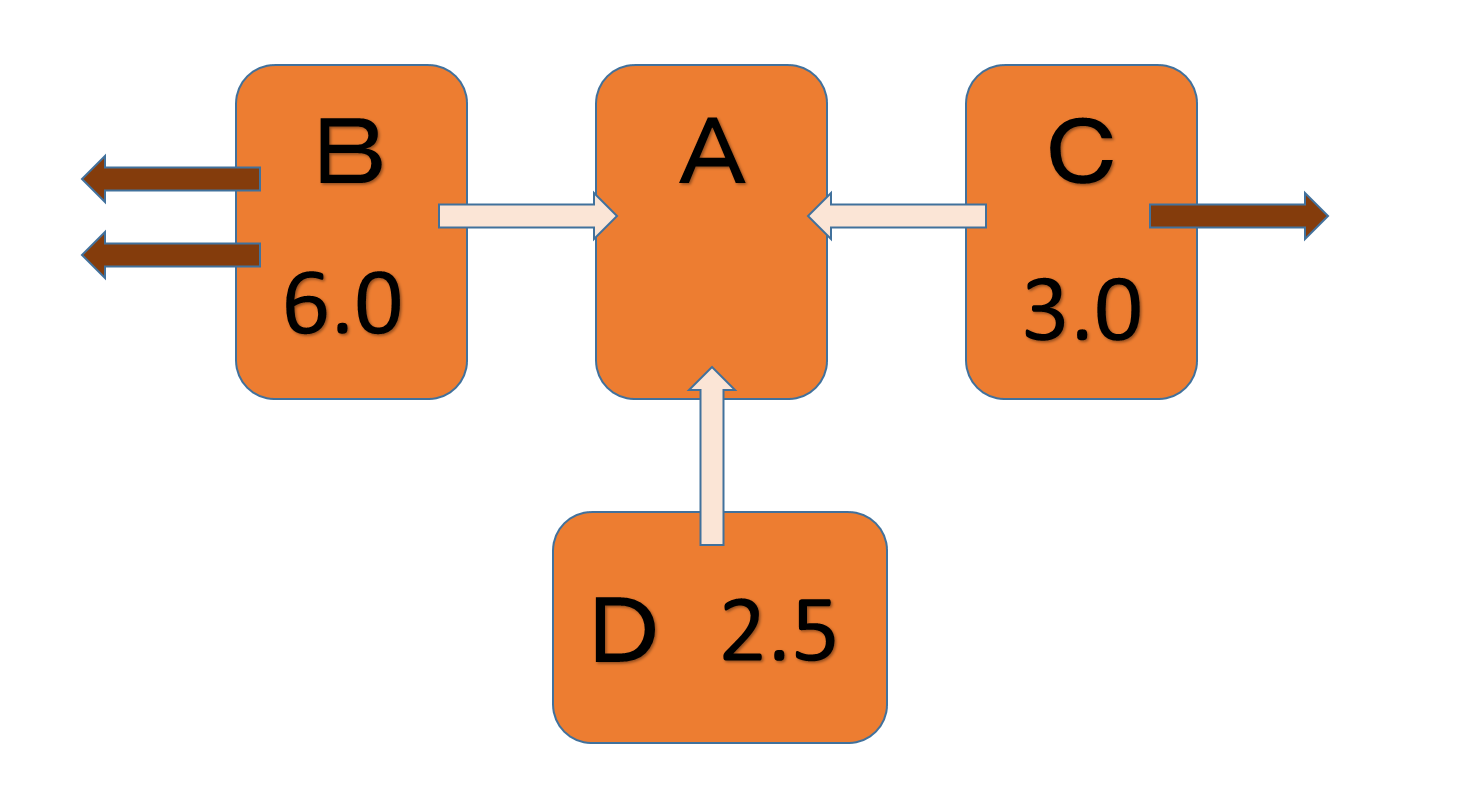

AのPageRankをB,C,DのPageRankから計算します。   
茶色の矢印はほかのページへのリンクを表し、薄橙の矢印がAへのリンクを表しています。   
PageRankは$\gamma$ ×$\frac{リンク元のPageRank}{リンク元のリンク先の数}$これの和で計算されます。   

AのPageRankは$\gamma$ = 1、   
$ PageRank_A = 6.0/3 + 3/2 + 2.5/1 = 6.0 $   
と計算できます。

#### 問題

- 以下の図からAのPageRankとして正しいものを選んでください。
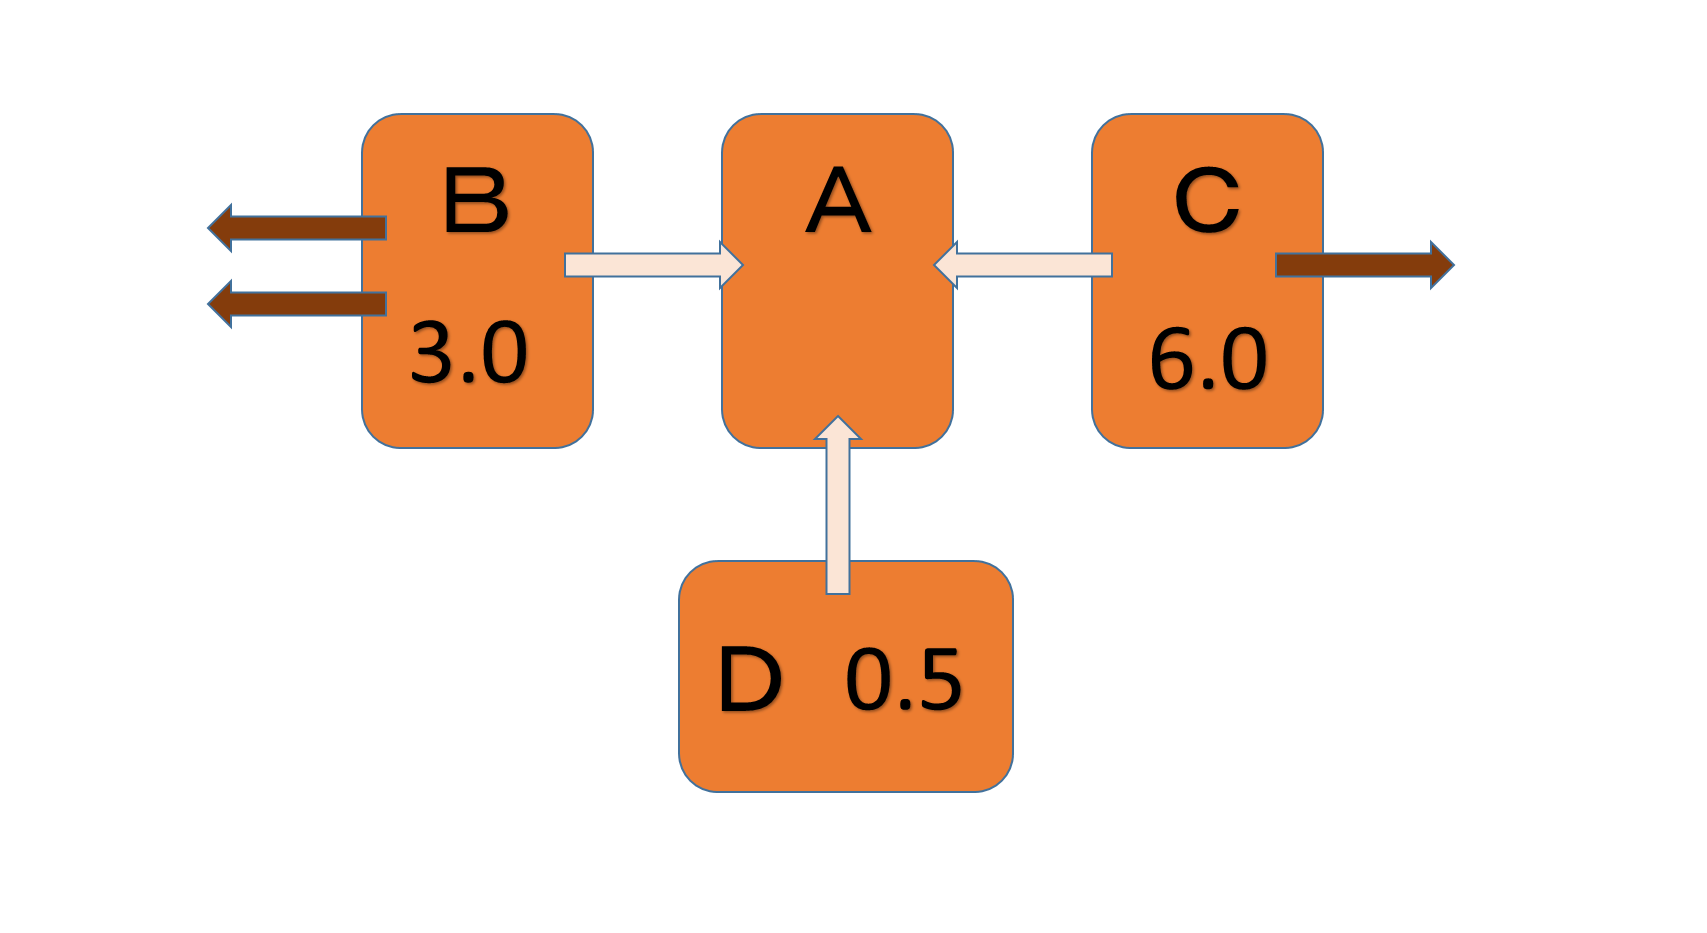

ただし$\gamma$=1とします。

- 4.0
- 4.5
- 5.0

#### ヒント

- PageRankは$\gamma$ × $\frac{リンク元のPageRank}{リンク元のリンク先の数}$これの和で計算されます。   

#### 解答

- 4.5

***

### 3.2.2 PageRankの計算(1)

それでは実際にPageRankの計算を行います。   
3.2.1で行ったように計算できればいいのですが、ひとつ問題が発生します。   
先ほどはAのPageRankを求めるために必要なPageRankがすべて求まっていたのですが、実際はそうはいきません。   

そこで解決策としては初期値に任意の値をすべてのPageRankとして与え、PageRankの計算を何度か繰り返すといったものがあります。   
計算を繰り返すことによってそれぞれのPageRankは真のPageRankの値に近づいていきます。   

それではPageRankを計算するアルゴリズムは次のようになります。
1. PageRankテーブルがすでに存在していれば削除する。
2. PageRankテーブルをカラムはURLとscoreで作成する。
3. PageRankテーブルにurllistからURLを与え、scoreに初期値を代入する。
4. すべてのURLでPageRankを計算する。
5. PageRankを更新する。

となっています。   
このアルゴリズムを作成するのに必要となるSQL文を勉強しましょう。   

1.PageRankテーブルがすでに存在していれば削除する。   
これは if exists メソッドを利用することでこのように書けます。   
drop table if exists pagerank   
if exists A は条件文であり、Aが存在すれば実行ということになります。   

3.PageRankテーブルにurllistからURLを与え、scoreに初期値を代入する。   
chapter1で学んだinsert文ですが値の部分にほかのカラムを入れても使うことができます。   
insert into pagerank select url,1.0 from urllist   
このようにするとpagerankのurlにはurllistのurlが入れられ、scoreにはすべて1.0が代入されます。  

4.すべてのurlでPageRankを計算する。     
SQLの更新にはupdateメソッドを利用します。   
update テーブル名 set カラム名 = 更新したい値 where 条件式   
で更新することができます。   
更新後は必ずcommitメソッドを呼び出すことを忘れないでください。   

#### 問題

データベースの更新を行ってください。sample.dbはdataフォルダ内にあります。
- sample.dbで a = 1の行のaの値を100に変えてください。
- sample.dbで a = 100の行のすべてのカラムの値を表示してください。
- sample.dbで a = 100 の行のaの値を1に変えてください。

In [ ]:
import sqlite3

dbname = "data/sample.db"
conn = sqlite3.connect(dbname)
#  a = 1 の行の a を100に変更してください。


# a = 100 の行のすべてのデータを取得してください。
data = 
print(data)

#  a = 100 の行の a を1に変更してください。

conn.close()

#### ヒント

- データを更新した後は必ずcommitメソッドを呼び出しましょう。

#### 解答例

In [ ]:
import sqlite3

dbname = "data/sample.db"
conn = sqlite3.connect(dbname)
#  a = 1 の行の a を100に変更してください。
conn.execute("update T set a = 100 where a = 1")
conn.commit()

# a = 100 の行のすべてのデータを取得してください。
data = conn.execute("select * from T where a = 100").fetchall()[0]
print(data)
#  a = 100 の行の a を1に変更してください。
conn.execute("update T set a = 1 where a = 100")
conn.commit()


conn.close()

***

### 3.2.3 PageRankの計算(2)

PageRankを実装します。   
すぐ上でも書きましたが、PageRankの計算アルゴリズムは次のようになります。   

1. PageRankテーブルがすでに存在していれば削除する。
2. PageRankテーブルをカラムはurlとscoreで作成する。
3. PageRankテーブルにurllistからurlを与え、scoreに初期値を代入する。
4. すべてのurlでPageRankを計算する。
5. PageRankを更新する。

select文でdistinctを利用すると内部のデータが重複ない形で抜き出すことができます。


#### 問題

- calculate_pagerankを完成させてページランクを計算する関数を実装してください。
- $\gamma$ = 0.85とします。

In [ ]:
def calculate_pagerank(conn, iterations=3):
    # PageRankがすでにあれば削除してください。
    
    # PageRankテーブルを作成してください。
    
    # PageRankの初期値を設定します。
    conn.execute("insert into pagerank select url,1.0 from urllist")
    conn.commit()

    for i in range(iterations):
        print("Iteration %d" % (i))
        for url, in conn.execute("select url from urllist"):
            pr = 0.15
            
            for (linker,) in conn.execute("select distinct url_from from link where url_to = '%s'" % url):
                # リンク元のPageRankを取得してください。
                linkingpr = 
                # リンク元のリンク先の数を取得してください。
                linkingcount =
                pr += gamma*(linkingpr/linkingcount)
                # PageRankの値を更新してください。

                
    print('finish create pagerank')
conn.close()

#### ヒント

- fetchone()で取得したデータはリストの形なので[0]をつけて数字にしてください。

#### 解答例

In [ ]:
def calculate_pagerank(conn, iterations=3):
    gamma = 0.85
    # pagerankがすでにあれば削除してください。
    conn.execute("drop table if exists pagerank")
    # pagerankテーブルを作成してください。
    conn.execute("create table pagerank(url,score)")
    # PageRankの初期値を設定します。
    conn.execute("insert into pagerank select url,1.0 from urllist")
    conn.commit()

    for i in range(iterations):
        print("Iteration %d" % (i))
        for url, in conn.execute("select url from urllist"):
            pr = 0.15
            
            for (linker,) in conn.execute("select distinct url_from from link where url_to = '%s'" % url):
                # リンク元のPageRankを取得してください。
                linkingpr = conn.execute("select score from pagerank where url='%s'" % linker).fetchone()[0]
                # リンク元のリンク先の数を取得してください。
                linkingcount =conn.execute("select count(*) from link where url_from = '%s'" % linker).fetchone()[0]
                pr += gamma*(linkingpr/linkingcount)
                # PageRankの値を更新してください。
                conn.execute("update pagerank set score = %f where url = '%s'" % (pr, url))
                conn.commit()
    
    print('finish create pagerank')
conn.close()

***

### 3.2.4 PageRankで重みづけする関数を作成する。

PageRankが計算できたのでこれを利用してページの重みづけをしましょう。   
インバウンドリンクと同様PageRankもクエリの情報を使用していないので他の評価方法と合わせて使用する必要があります。   

#### 問題

- PageRankによりページの重みづけをしてください。
- 出力は正規化関数に渡して０～１で正規化してください。

In [ ]:
def pagerankscore(rows):
    # pagerankに{URL:PageRank}の辞書型を代入してください。
    pagerank = 
    return normalizescores(pagerank)

#### ヒント

- PageRankを得るときfetchoneメソッドではリストの形になってしまうので[0]をつけましょう。

#### 解答例

In [ ]:
def pagerankscore(rows):
    # pagerankに{URL:PageRank}の辞書型を代入してください。
    pagerank = dict([(row[0], self.con.execute("select score from pagerank where url = '%s'" % row[0]).fetchone()[0]) for row in rows])
    return normalizescores(pagerank)

## 3.3 searcherをクラスにまとめる。

### 3.3.1 初期値の設定

検索に関するものをまとめてsearcherという一つのクラスで管理します。   
searcherクラスでは、
1. クエリを受け取る。
2. クエリの含まれるページのURLを取得する。
3. 取得されたURLを評価関数によって重みづけする。
4. 評価値の高いものからいくつかをレコメンドする。

をします。      
crawlerクラスと同様にsearcherクラスでも初期値を設定していきます。

#### 問題

- crawlerと同様にsearcherでも初期設定で変数connをtest.dbにつなげてください。
- searcherが破棄されたとき、接続を閉じるようにしてください。

In [ ]:
import sqlite3

class searcher:
    # 初期設定をしてください。

    conn = 
    # コネクションが削除されたときデータベースとの接続が切れるようにしてください。

    

#### ヒント

- 初期設定には`__init__`メソッド、削除されたときには`__del__`メソッドが使えます。

#### 解答

In [ ]:
import sqlite3

class searcher:
    # 初期設定をしてください。
    def __init__(self,dbname):
        self.conn = sqlite3.connect(dbname)
    # コネクションが削除されたときデータベースとの接続が切れるようにしてください。
    def __del__(self):
        self.conn.close()

***

### 3.3.2 評価値の高いものをレコメンドする。

ここまででクエリの含まれているページを選定し、様々な評価方法によりページの重みを決定しました。   
この重みを利用してレコメンドします。   
これらの情報を使用して実際におすすめするページのURLをリストにして返す関数を作成しましょう。   

#### 問題

- 空欄を埋めて重みの大きい１０のWEBページをリストで返してください。

In [ ]:
def query(q):
    rows,words = get_match_rows(q)
    # scoresに評価値を代入してください。
    scores = 
    # rankedscoresに並び替え済みの評価値を代入してください。
    rankedscores = 
    recommend_list = []
    # recommend_listに評価値の高いURLを１０代入してください。

    
    return recommend_list

#### ヒント

- get_match_rows() は クエリがすべて含まれているURL、クエリの単語の位置、クエリの単語を返す関数です。
- weightlist() は 評価関数によって求められた評価値を返す関数です。

#### 解答例

In [ ]:
def query(q):
    rows,words = get_match_rows(q)
    # scoresに評価値を代入してください。
    scores = weightlist(rows, words)
    # rankedscoresに並び替え済みの評価値を代入してください。
    rankedscores = sorted([(score, url) for (url,score) in scores.items()], reverse = 1)
    recommend_list = []
    # recommend_listに評価値の高いURLを１０代入してください。
    for i,(score, url) in enumerate(rankedscores[0:10]):
        recommen_list.append(url)
    return recommend_list


***

### 3.3.3 これまでの関数をsearcherクラスに入れます。

以下のものがsearchクラスで作成した関数一覧になります。   
これらを修正してsearchクラスにいれます。   

クラスにいれるときはよりメインとなる関数は下に配置しましょう。   
```python

def get_match_rows(conn, q):
    columnlist = 'w0.url'
    tablelist = ''
    conditionlist = ''
    words_list = []

    words = q.split(' ')
    tablenumber = 0
    for word in words:
        wordrow = conn.execute("select word from wordlist where word='%s'" %word).fetchone()
        if wordrow :
            words_list.append(word)
            if tablenumber > 0:
                tablelist += ','
                conditionlist += ' and w%d.url=w%d.url and ' % (tablenumber-1,tablenumber)
                
            columnlist += ',w%d.location' % tablenumber
            tablelist += 'wordlocation w%d' % tablenumber
            conditionlist+="w%d.word='%s'" % (tablenumber,word)
            tablenumber += 1
    sql="select %s from %s where %s" % (columnlist,tablelist,conditionlist)
    cur=conn.execute(sql)
    rows=[row for row in cur]
    return rows,words_list
    

def normalizescores(scores, small_flag=0):
    vsmall = 0.00001
    if small_flag:
        minscore = min(scores.values())
        return dict([(url,float(minscore)/max(vsmall,l)) for (url,l) in scores.items()])
    else:
        maxscore = max(scores.values())
        if maxscore == 0:
            maxscore = vsmall
        return dict([(url,float(count) / maxscore) for (url,count) in scores.items()])
    
def frequeryscore(rows):
    counts = dict([(row[0], 0) for row in rows])
    for row in rows:
        counts[row[0]] += 1
    return　normalizescores(counts)

    
def locationscore(rows):
    locations = dict([(row[0],1000000) for row in rows])
    for row in rows:
        location = sum(row[1:])
        if location < locations[row[0]]:
            locations[row[0]] = location
        return normalizescores(locations, small_flag=1)
        
def distancescore(rows):
    if len(rows[0]) <= 2:
        return dict([(row[0],1.0) for row in rows])
    mindistance = dict([(row[0],1000000) for row in rows])
    for row in rows:
        dist = sum([abs(row[i] - row[i-1]) for i in range(2,len(row))])
        if dist < mindistance[row[0]]:
            mindistance[row[0]] = dist
    return normalizescores(mindistance, small_flag=1)

def pagerankscore(rows):
    pagerank = dict([(row[0], self.conn.execute("select score from pagerank where url = '%s'" % row[0]).fetchone()[0]) for row in rows])
    return normalizescores(pagerank)
    

def weightlist(rows, words_list):
    totalscores = dict([(row[0],0) for row in rows])

    weights = []

    for (weight, scores) in weights:
        for url in totalscores:
            totalscores[url] += weight * scores[url]
    return totalscores
    
def query(q):
    rows,words = get_match_rows(q)
    scores = weightlist(rows, words)
    rankedscores = sorted([(score, url) for (url,score) in scores.items()], reverse = 1)
    recommend_list = []
    for i,(score, url) in enumerate(rankedscores[0:10]):
        recommend_list.append(url)
    return recommend_list

```


#### 問題

- これまで作ってきた関数を変換してsearchクラスにいれてください。
- 同時にweightlist()メソッドのweightを変更して4つの評価関数で評価できるようにしてください。   
  評価関数自体の重みはすべて1とします。

In [ ]:
import sqlite3

class searcher:
    def __init__(self,dbname):
        import sqlite3
        self.conn = sqlite3.connect(dbname)
        
    def __del__(self):
        self.conn.close()
    
    # 上の関数をクラスの関数の形に変換して書き加えてください。


#### ヒント

- 関数の第一引数にはselfを渡してください。
- クラス内の変数や関数を呼び出すときはself.関数名・変数名とする必要があります。

#### 解答例

In [ ]:
import sqlite3

class searcher:
    def __init__(self,dbname):
        import sqlite3
        self.conn = sqlite3.connect(dbname)
        
    def __del__(self):
        self.conn.close()
    
    # 上の関数をクラスの関数の形に変換して書き加えてください。
    def get_match_rows(self, q):
        columnlist = 'w0.url'
        tablelist = ''
        conditionlist = ''
        words_list = []

        words = q.split(' ')
        tablenumber = 0
        for word in words:
            wordrow = self.conn.execute("select word from wordlist where word='%s'" %word).fetchone()
            if wordrow :
                words_list.append(word)
                if tablenumber > 0:
                    tablelist += ','
                    conditionlist += ' and w%d.url=w%d.url and ' % (tablenumber-1,tablenumber)
                columnlist += ',w%d.location' % tablenumber
                tablelist += 'wordlocation w%d' % tablenumber
                conditionlist+="w%d.word='%s'" % (tablenumber,word) 
                tablenumber += 1


        sql="select %s from %s where %s" % (columnlist,tablelist,conditionlist)
        cur=self.conn.execute(sql)
        rows=[row for row in cur]
        return rows,words_list

    def normalizescores(self, scores, small_flag=0):
        vsmall = 0.00001
        # small_flagが1だと小さいほうが重みが1に近づくようになる。
        if small_flag:
            minscore = min(scores.values())
            return dict([(url,float(minscore)/max(vsmall,l)) for (url,l) in scores.items()])
        else:
            maxscore = max(scores.values())
            if maxscore == 0:
                maxscore = vsmall
            return dict([(url,float(count) / maxscore) for (url,count) in scores.items()])


    def frequeryscore(self, rows):
        counts = dict([(row[0], 0) for row in rows])
        for row in rows:
            counts[row[0]] += 1
        return self.normalizescores(counts)

    def locationscore(self, rows):
        locations = dict([(row[0],1000000) for row in rows])
        for row in rows:
            location = sum(row[1:])
            if location < locations[row[0]]:
                locations[row[0]] = location
            return self.normalizescores(locations, small_flag=1)
    
    def distancescore(self,rows):
        if len(rows[0]) <= 2:
            return dict([(row[0],1.0) for row in rows])
        mindistance = dict([(row[0],1000000) for row in rows])
        for row in rows:
            dist = sum([abs(row[i] - row[i-1]) for i in range(2,len(row))])
            if dist < mindistance[row[0]]:
                mindistance[row[0]] = dist
        return self.normalizescores(mindistance, small_flag=1)
    
    def pagerankscore(self, rows):
        pagerank = dict([(row[0], self.conn.execute("select score from pagerank where url = '%s'" % row[0]).fetchone()[0]) for row in rows])
        return self.normalizescores(pagerank)

    def weightlist(self, rows):
        totalscores = dict([(row[0],0) for row in rows])

        weights = [(1.0, self.frequeryscore(rows))
                    ,(1.0, self.locationscore(rows))
                    ,(1.0, self.distancescore(rows))
                    ,(1.0, self.pagerankscore(rows))]

        for (weight, scores) in weights:
            for url in totalscores:
                totalscores[url] += weight * scores[url]
        return totalscores



    def query(self, q):
        rows,words = self.get_match_rows(q)
        scores = self.weightlist(rows)
        rankedscores = sorted([(score, url) for (url,score) in scores.items()], reverse = 1)
        recommend_list = []
        for i,(score, url) in enumerate(rankedscores[0:10]):
            recommend_list.append((url,score))
        return recommend_list
    

***

## 添削問題

searchクラスを利用して、program study で検索した結果推薦度の高い10のURLを表示してください。

#### 問題

- searchクラスを利用して、program study で検索した結果推薦度の高い10のURLを表示してください。
- データベースはdataフォルダ内のwebpage.dbを利用してください。
- webpage.dbはクローリング済みなのでそのまま利用できます。
- 評価関数はインバウンドリンク以外の4つを使用し、評価関数の重みはすべて1にしてください。

In [ ]:
# 今まで学んだことを利用して推薦度の高いURLを10表示してください。


#### ヒント

- 上で学んだsearcherクラスを利用してください。

#### 解答例

In [ ]:
# 今まで学んだことを利用して推薦度の高いURLを10表示してください。

dbname = "data/webpage.db"
s = searcher(dbname)
query = "program study"
urls_list = s.query(query)
for url,score in urls_list:
    print(score,url)


#### 解説

評価関数の重みを変えることによってより精度よくレコメンドすることができます。

***